#Clasificar flores de Iris

In [4]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [5]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

##Binary Cross Entropy Loss

Normalmente es usada en problemas binarios de clasificación, aunque también puede ser en problemas donde las variables a predecir toman valores entre cero y uno. Su fórmula es la siguiente:


$$-\frac{1}{n} \sum_{j=1}^{n} \sum_{i=1}^{c} [ y_i log(p_i) + (1-y_i)log(1-p_i) ]$$


Donde

y: la clase a predecir

P: probabilidad predicha para la clase

c: número de clases

n: número de ejemplos

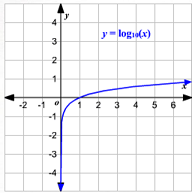

# Iris

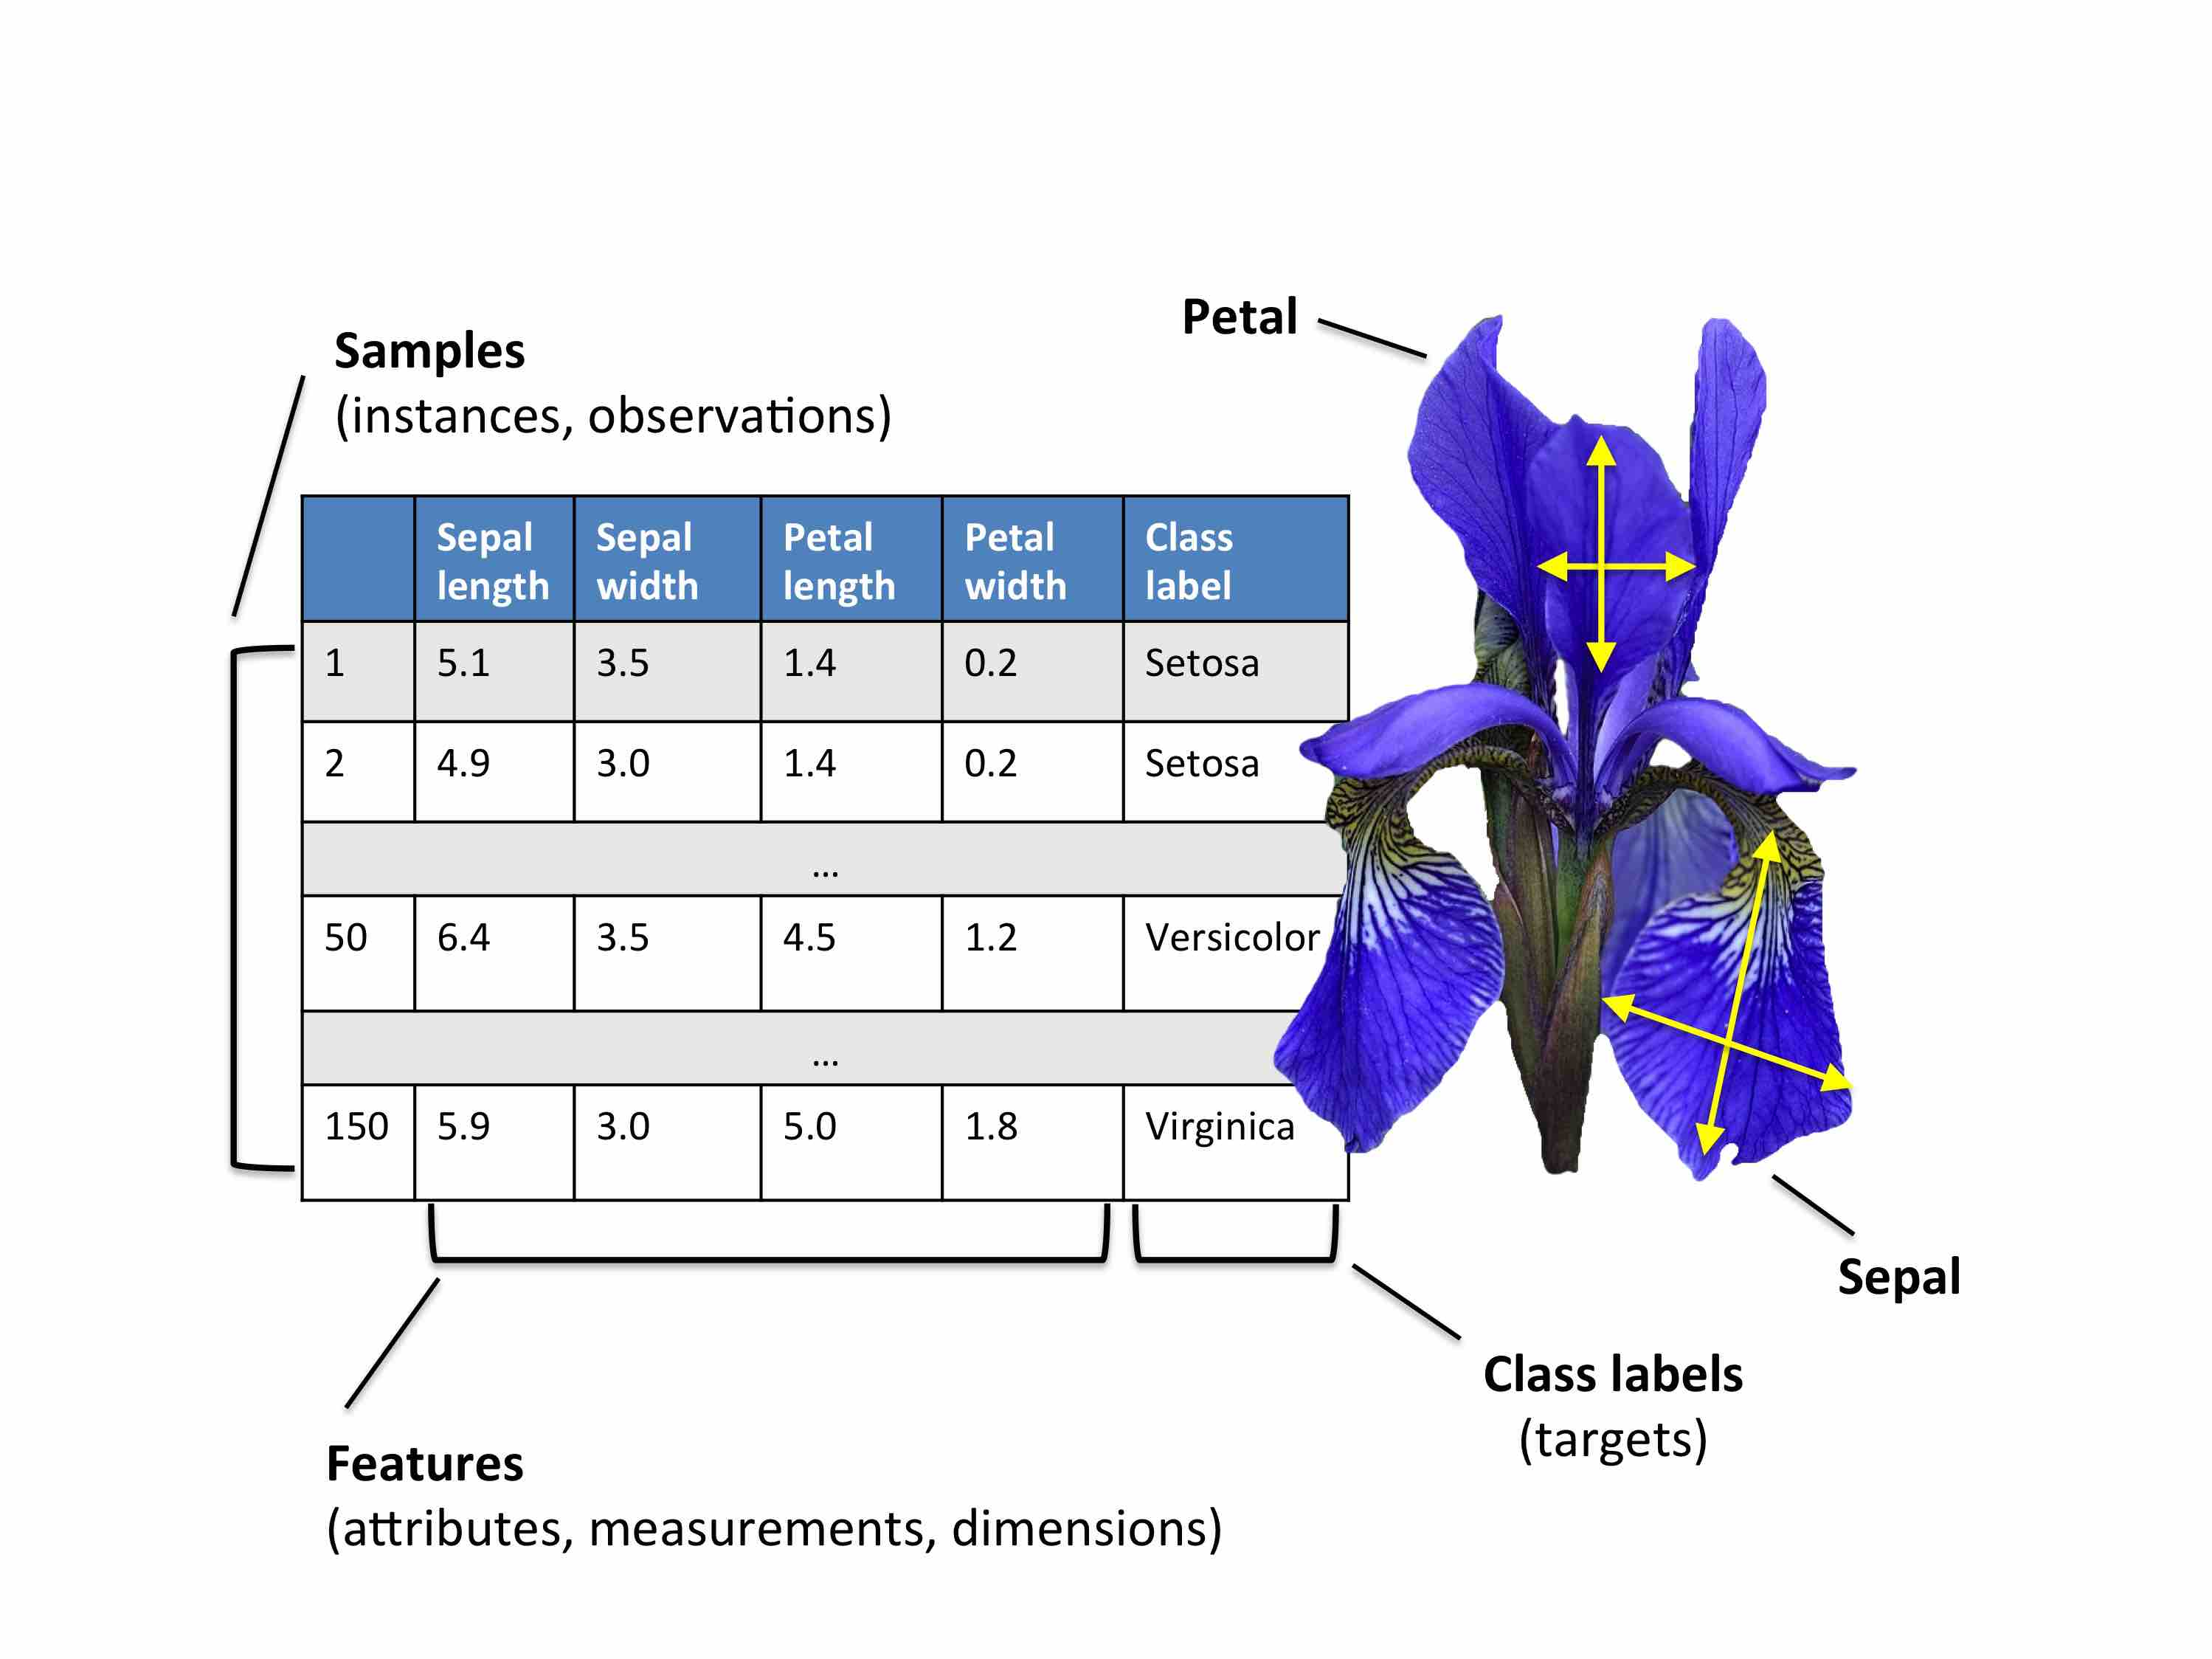

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.utils import to_categorical

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

##Dataset

In [7]:
iris = datasets.load_iris()

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
X = iris.data
y = iris.target

In [10]:
names = iris['target_names']
feature_names = iris['feature_names']

feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

In [12]:
X.shape, Y.shape

((150, 4), (150, 3))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [14]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

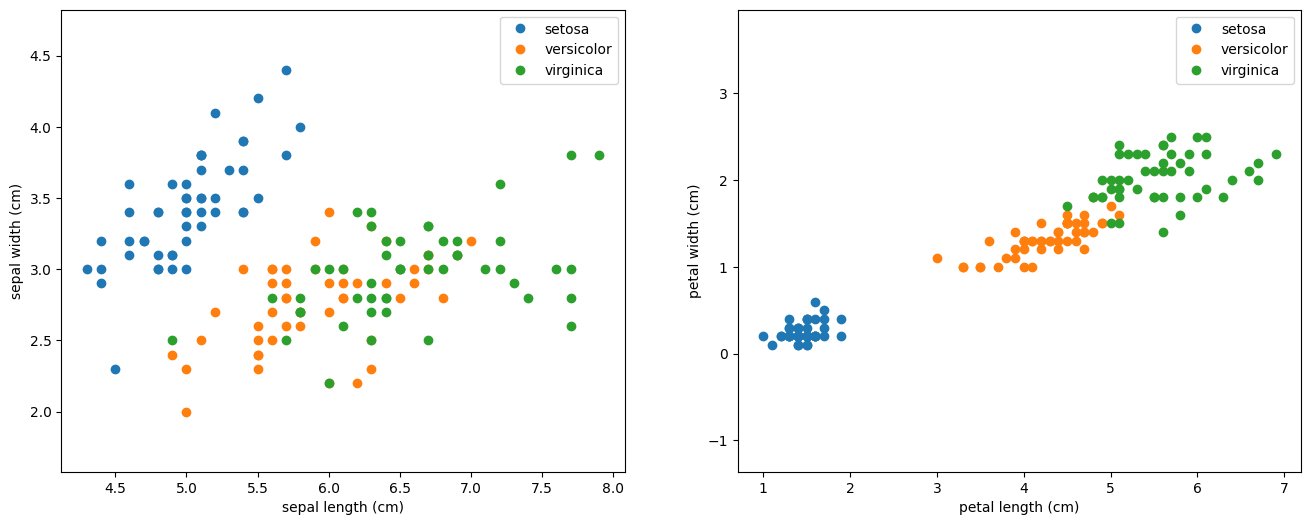

In [24]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

plt.savefig('iris_scatter.jpg')

##Modelo

In [16]:
classifier = Sequential()
classifier.add(Input(shape=(X_train.shape[1],)))
classifier.add(Dense(8, activation = 'relu'))

#output layer with 1 output neuron which will predict 1 or 0
classifier.add( Dense( 3, activation = 'softmax' ) )

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

###Entrenamiento

In [25]:
historial = classifier.fit(X_train, y_train, validation_split=0.2, epochs = 300, verbose = 0)

In [18]:
score = classifier.evaluate(X_test, y_test, verbose=0)
score

[0.49934229254722595, 0.7333333492279053]

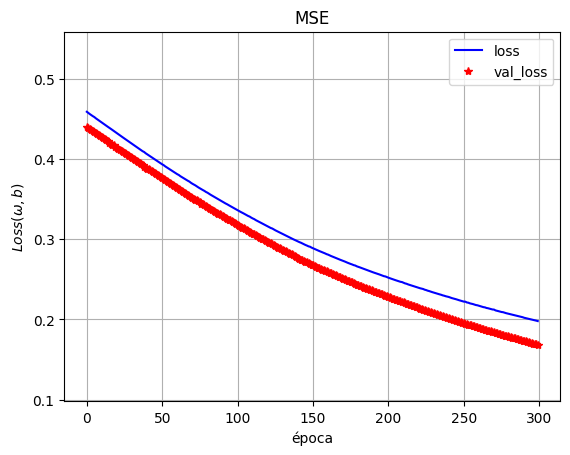

In [26]:
plt.plot(historial.epoch,historial.history['loss'], 'b',label="loss")
plt.plot(historial.epoch,historial.history['val_loss'], '*r',label="val_loss")
plt.title(u'MSE')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.ylim([np.min(historial.history['loss'])-0.1,np.max(historial.history['loss'])+0.1])
plt.grid(True)
plt.savefig('iris_loss.jpg')

In [20]:
prediccion = classifier.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [21]:
y_pred = np.argmax(prediccion, axis=1)

In [22]:
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay

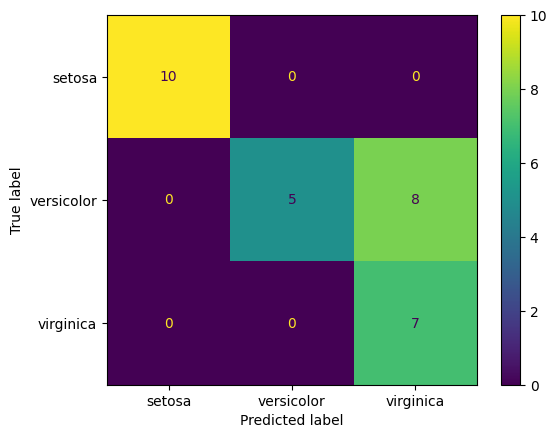

In [29]:
con = confusion_matrix( np.argmax(y_test, axis=1) , y_pred )

disp = ConfusionMatrixDisplay( confusion_matrix = con,  display_labels = iris.target_names  ).plot()
plt.savefig('iris_confusion_matrix.jpg')